**Objective:** Determine the current situation of cases with COVID-19 in Mexico related to the geographical distribution of the disease.

****Questions**** Miguel
### What's the distribution of positive cases in Mexico? 
The distribution of positive covid19 cases are significantly greater in areas of high population, commerce and travel such as the capital city/state of CDMX, the state of Mexico, Baja California, Tabasco, Sinaloa, Quintana Roo, Puebla, Veracruz and Yucatan.

The positive cases are evenly distributed across the entire country with the exception of less populated desert climates of Sonora and parts of Baja California and the large natural reserve forest areas of Campeche

### What's the distribution of deaths by state? 
Although the number of positive covid19 cases are significantly greater in areas of high population there is also a higher level of medical care in these areas resulting in a lower mortality rate. More rural areas of lower population such as Colima, Oaxaca, Zacatecas and Jalisco have a much higher mortality rate of aproximately 30% compared to only 8% in CDMX. However, this is greatly due to the higher number of cases in metropolitan areas due to the close proximity of the population.

The distribution of deaths are largely centered around metropolitan areas and cities with high tourism such as Aguascalientes, Santiago de Queretaro, Monclova, Chihuahua, Durango, Tijuana, Mexico City, Puebla, Huitiupán Chiapas and Cancún

### What's the distribution of Health Centers in relation to deaths?
The distribution of hospitals and Health Centers largely follows the population of cities along with the number of cases and deaths. For the most part, the capacity of hospitals, although overwhelmed with cases during this crisis, are able to respond to the disease in most cities. However there are areas with a high number of cases and very few medical facilites such as central Baja California Sur which only has major hospitals at the southern tip of the peninsula and to the east crossing the Gulf in Hermosillo. Cancún also has very few treatment facilities and patients there may have to be transfered via ambulance to Merida Yucatán or by helicopter or ferry to Cozumel. Given the high demand for beds, hospitals in cities with very few reported cases could be used to treat patients from sorrounding areas which are currently at full capacity.



## Generate list of all cities with lat lng coordinates using google Geocoding API

In [ ]:
# #get lat lngs data for municipalities in the top 5 states
# geocode_url = "https://maps.googleapis.com/maps/api/geocode/json"

# params = {
#     "key": google_maps_api_key,
# }

# response_list = []

# #get list of unique city and state combos and their lat lng values
# unique_cities = []
# unique_lats = []
# unique_lngs = []

# for index, row in covid_positive_df.iterrows():
#     city_state = row["MUNICIPIO_RES"] + ', ' + row["ENTIDAD_RES"]
#     if(city_state not in unique_cities):
#         unique_cities.append(city_state)

# # iterate through all city_states to get lat lng info for each city.
# for city in unique_cities:
#     print("Searching for Lat Lng info "+ city +"...")
#     params["address"] = city
#     response = requests.get(geocode_url, params= urllib.parse.urlencode(params))
#     response_json = response.json()
#     # Check that city has entry on OpenWeatherMap.
#     if response_json['status'] == "OK" and len(response_json["results"]):
#         #check address components to see if we got a locality (city)
#         city_found = False
#         for adr_comp in response_json["results"][0]["address_components"]:
#             if('locality' in adr_comp["types"]):
#                 city_found = True
#         if(city_found):
#             unique_lats.append((response_json["results"][0]["geometry"]["location"]["lat"]))
#             unique_lngs.append((response_json["results"][0]["geometry"]["location"]["lng"]))
#         else:
#             print("City not found. Skipping...")
#             unique_lats.append(0)
#             unique_lngs.append(0)
#     else:
#         print("No Results, Skipping...")
#         unique_lats.append(0)
#         unique_lngs.append(0)

# #make new data frame with city names and lat lngs
# cities_df = pd.DataFrame({
#     "Name": unique_cities,
#     "Lat" : unique_lats,
#     "Lng" : unique_lngs,
# })
# #filter out the empty lat longs
# cities_df = cities_df.loc[cities_df["Lat"] > 0,:]

# #save cities_df to seperate csv for future use without API calls
# cities_df.to_csv('cities_mx_lat_lngs_data.csv', index=False)
# cities_df

## Generate list of all hospitals with lat lng coordinates using google Nearby Search API

In [ ]:
# #get hospital locations for markers
# google_nearby_search_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# parameters = {
#             "types": "hospital",
#             "radius": 3000,
#             "key": google_maps_api_key}

# hospitals = {}

# for index, row in cities_df.iterrows():
#     latitude = row["Lat"]
#     longitude = row["Lng"]
#     parameters["location"] = f"{latitude},{longitude}"
    
#     print(f"Searching for hospitals near {row['Name']}.")
#     response = requests.get(google_nearby_search_url, params=parameters).json()
#     results = response["results"]
#     try:
#         print(results)
#         hospitals[row["Name"]] = results
#     except (KeyError, IndexError):
#         print("No results, skipping.")
        
# hospitals

## Import dependencies and cleaned covid data csv

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import scipy.stats as st
from pprint import pprint
import urllib.parse

# Import API key (config is added to gitignore to protect Personal API Keys, user your own to run commands)
from config import google_maps_api_key

csv_path = "Resources/COVID_Clean_Data.csv"
covid_df = pd.read_csv(csv_path)

#to show all columns in previews
pd.options.display.max_columns = 500
covid_df.head()

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,2020-03-18,9999-99-99,No Aplica,No,29,Mexicana,No Aplica,No,No,No,No,No,No,No,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,2020-03-23,2020-04-11,No,No,64,Mexicana,No Aplica,No,No,Si,Si,No,Si,No,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,2020-03-28,2020-03-30,Si,Si,64,Mexicana,No Aplica,No,No,No,Si,No,No,No,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,2020-03-29,9999-99-99,No,Si,41,Mexicana,No Aplica,No,No,No,No,No,No,No,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,2020-03-26,9999-99-99,No Aplica,No,69,Mexicana,No Aplica,No,Si,No,No,No,No,No,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica


## Import cities lat lng csv created from API previously

In [3]:
csv_path = "cities_mx_lat_lngs_data.csv"
cities_df = pd.read_csv(csv_path)
cities_df.head()

,Name,Lat,Lng
0,"Juarez, Ciudad De Mexico",19.426753,-99.161845
1,"Santiago Amoltepec, Oaxaca",16.641227,-97.495875
2,"Jesus Maria, Ciudad De Mexico",19.428556,-99.128511
3,"Jesus Maria, Colima",19.245234,-103.724087
4,"Pantepec, Oaxaca",20.520016,-97.938857


## Import Hospitals lat lng csv created from API previously

In [11]:
csv_path = "unique_hospitals_mexico.csv"
unique_hospitals_df = pd.read_csv(csv_path)
unique_hospitals_df.head()

,name_full,lat,lng,types
0,"Unidad Quirúrgica Montgober, Juarez, Ciudad De...",19.415515,-99.157304,"['hospital', 'health', 'point_of_interest', 'e..."
1,Hospital Santiago Amoltepec. En proceso de con...,16.652620,-97.500731,"['hospital', 'health', 'point_of_interest', 'e..."
2,"Hospitalito, Jesus Maria, Ciudad De Mexico",19.447811,-99.112463,"['hospital', 'health', 'point_of_interest', 'e..."
3,"Unión Médica Adame, Jesus Maria, Colima",19.244757,-103.723690,"['hospital', 'health', 'point_of_interest', 'e..."
4,"UMR Pantepec, Pantepec, Oaxaca",20.521237,-97.939476,"['hospital', 'health', 'point_of_interest', 'e..."


## Analysis of data to find states with the most cases and number of deaths in each state

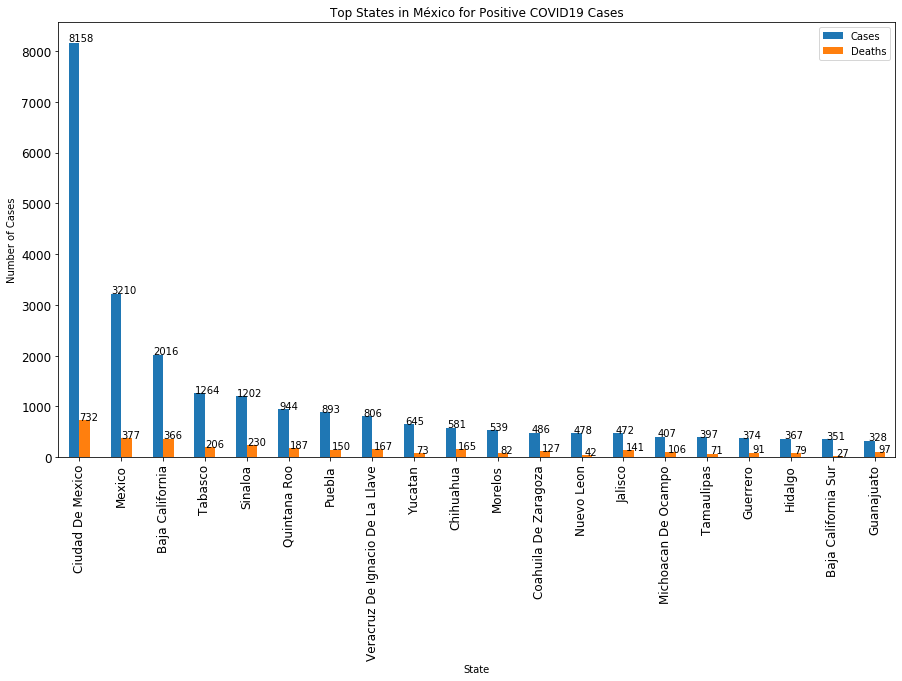

In [4]:
#created new data frame filtered from covid data for positive cases only
covid_positive_df = covid_df.loc[covid_df["RESULTADO"] == "Positivo SARS-CoV-2",:]
covid_positive_df

#create new data frame filtered for fatalities cases only
covid_deaths_df = covid_df.loc[covid_df["FECHA_DEF"] != "9999-99-99",:]
covid_deaths_df

#groupby state and get count of positive cases by state
cases_by_state = covid_positive_df.groupby("ENTIDAD_UM")["ID_REGISTRO"].count().sort_values(ascending=False)

#groupby state and get count of deaths by state
deaths_by_state = covid_deaths_df.groupby("ENTIDAD_UM")["ID_REGISTRO"].count().sort_values(ascending=False)

#concat grouped results into one dataframe
case_to_death_by_state_df = pd.concat([cases_by_state, deaths_by_state], axis=1)
case_to_death_by_state_df.columns = ["Cases","Deaths"]

#create a bar chart showing 20 top states for covid cases and number of deaths in each state
ax = case_to_death_by_state_df.head(20).plot.bar(rot=90,fontsize="12", stacked=False, figsize=(15,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() *1.005))

plt.title(f"Top States in México for Positive COVID19 Cases")
plt.xlabel("State")
plt.ylabel("Number of Cases")

plt.savefig("Results_visualizations/COVID19_bar_top_states_positive_cases.png")
plt.show()

* The distribution of positive covid19 cases are significantly greater in areas of high population, commerce and travel such as the capital city/state of CDMX, the state of Mexico, Baja California, Tabasco, Sinaloa, Quintana Roo, Puebla, Veracruz and Yucatan. 

## Analysis of data to find states with the hightest mortality rates

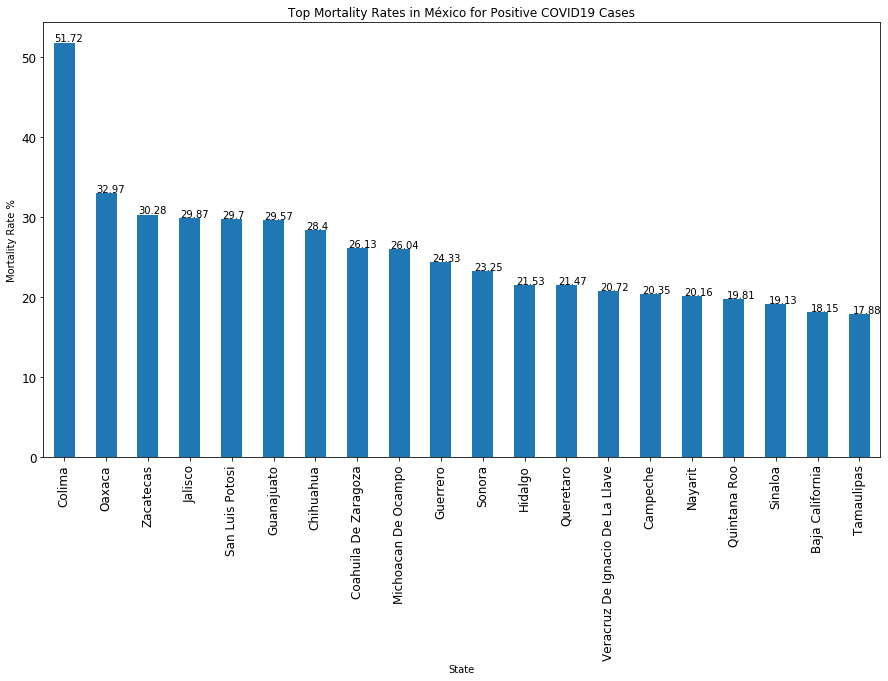

In [5]:
#calculate mortality rate by state
case_to_death_by_state_df["Mortality Rate %"] = [ round(row["Deaths"] / row["Cases"] * 100,2) for index, row in case_to_death_by_state_df.iterrows()]
#sort to get the states with the highest mortality rates
case_to_death_by_state_df = case_to_death_by_state_df.sort_values("Mortality Rate %",ascending=False)

#create a bar chart showing 10 states with highest mortality rates
ax =case_to_death_by_state_df["Mortality Rate %"].head(20).plot.bar(rot=90,fontsize="12", stacked=False, figsize=(15,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() *1.005))

plt.title(f"Top Mortality Rates in México for Positive COVID19 Cases")
plt.xlabel("State")
plt.ylabel("Mortality Rate %")
plt.savefig("Results_visualizations/COVID19_bar_top_states_mortality_rates.png")
plt.show()

* Although the number of positive covid19 cases are significantly greater in areas of high population there is also a higher level of medical care in these areas resulting in a lower mortality rate. More rural areas of lower population such as Colima, Oaxaca, Zacatecas and Jalisco have a much higher mortality rate of aproximately 30% compared to only 8% in CDMX. However, this is greatly due to the higher number of cases in metropolitan areas due to the close proximity of the population.

## Generate heat map of positive covid19 cases reported in México

In [6]:
# Configure gmaps with API key
gmaps.configure(api_key=google_maps_api_key)

# Store Latitude and Longitude into coords 
coords = cities_df[["Lat", "Lng"]].astype(float)

#create new cases column in data frame
cities_df["Cases"] = 0
case_counts = []

#do a lookup for each city and get number of positive cases reported
for index, row in cities_df.iterrows():
    num_cases = len(covid_positive_df.loc[ (covid_positive_df["MUNICIPIO_RES"] + ', ' + covid_positive_df["ENTIDAD_RES"]) == row["Name"] ])
    case_counts.append(num_cases)

cities_df["Cases"] = case_counts

# set type to float for Cases column
cities_cases_df = cities_df["Cases"].astype(float)

# average of highest cases to use as reference for heat map painting
mean_cases = cities_df["Cases"].head(10).mean()
print(mean_cases) 

cities_df = cities_df.sort_values("Cases",ascending=False)
cities_df.head()

258.8


,Name,Lat,Lng,Cases
13,"Rincon De Romos, Ciudad De Mexico",22.228913,-102.320619,1309
2,"Jesus Maria, Ciudad De Mexico",19.428556,-99.128511,871
51,"Pabellon De Arteaga, Sinaloa",22.144474,-102.274822,770
90,"Cosio, Tabasco",17.976432,-92.985261,757
55,"Guerrero, Ciudad De Mexico",19.444523,-99.142542,604


In [7]:
#configure gmaps heat layer
fig = gmaps.figure(center = (25.311829, -100.148240), zoom_level = 5, layout={
        'width': '950px',
        'height': '500px',
        'padding': '3px',
        'border': '1px solid black'
})
heat_map = gmaps.heatmap_layer(coords, weights=cities_cases_df, 
                                 dissipating=False, max_intensity=mean_cases,
                                 point_radius = 1)
fig.add_layer(heat_map)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))

* The positive cases are evenly distributed across the entire country with the exception of less populated desert climates of Sonora and parts of Baja California and the large natural reserve forest areas of Campeche

## Generate heat map of mortality rates for states in México

In [8]:
#for state lat longs we will use the city lat lng with the highest number of cases
states_list = case_to_death_by_state_df.index.to_list()
states_lats = []
states_lngs = []
states_mort = []

for state_name in states_list:
    for index, row in cities_df.iterrows():
        if(state_name in row["Name"]):
            states_lats.append(row["Lat"])
            states_lngs.append(row["Lng"])
            states_mort.append(case_to_death_by_state_df.loc[state_name]["Mortality Rate %"])
            break

#create new dataframe for states mortality 
states_mort_df = pd.DataFrame({
    "State": states_list,
    "Lat": states_lats,
    "Lng": states_lngs,
    "Mortality Rate %": states_mort,
})

#convert to floats for gmaps
coords = states_mort_df[["Lat","Lng"]].astype(float)
state_mort_weights = case_to_death_by_state_df["Mortality Rate %"].astype(float)

# average of highest mortality rates to use as reference for heat map painting
mean_morts = states_mort_df["Mortality Rate %"].head(5).mean()
print(mean_morts) 

#configure gmaps heat layer
fig = gmaps.figure(center = (25.311829, -100.148240), zoom_level = 5, layout={
        'width': '950px',
        'height': '500px',
        'padding': '3px',
        'border': '1px solid black'
})
heat_map = gmaps.heatmap_layer(coords, weights=state_mort_weights, 
                                 dissipating=False, max_intensity=mean_morts,
                                 point_radius = 1)
fig.add_layer(heat_map)
fig


34.908


Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))

* the distribution of deaths are largely centered around metropolitan areas and cities with high tourism such as Aguascalientes, Santiago de Queretaro, Monclova, Chihuahua, Durango, Tijuana, Mexico City, Puebla, Huitiupán Chiapas and Cancún

## Add layer with hospital locations data over mortality heat map

In [12]:
hosp_locs = unique_hospitals_df[["lat","lng"]]

# Using the template add the hospital data marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name_full}</dd>
<dt>Types</dt><dd>{types}</dd>
</dl>
"""
# Store the DataFrame Row
hosp_info = [info_box_template.format(**row) for index, row in unique_hospitals_df.iterrows()]
# Add marker layer ontop of heat map
hospitals_popups = gmaps.symbol_layer(hosp_locs, scale = 2,info_box_content = hosp_info)
fig.add_layer(hospitals_popups)

markers = gmaps.marker_layer(hosp_locs)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))

* The distribution of hospitals largely follows the population of cities along with the number of cases and deaths. For the most part, the capacity of hospitals, although overwhelmed with cases during this crisis are able to respond to the disease in most cities. However there are areas with a high number of cases and very few medical facilites such as central Baja California Sur which only has major hospitals at the southern tip of the peninsula and to the east crossing the Gulf in Hermosillo. Cancún also has very few treatment facilities and patients there may have to be transfered via ambulance to Merida Yucatán or by helicopter or ferry to Cozumel. Given the high demand for beds, hospitals in cities with very few reported cases could be used to treat patients from sorrounding areas which are currently at full capacity. 